In [2]:
import  torch
from    torch import nn
from    torch import optim
from    torch.nn import functional as F

In [6]:
# one-layer RNN
rnn=nn.RNN(100,10)  #[input dim(feature dim/word vector),hidden dim]
print(rnn._parameters.keys())


odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0'])


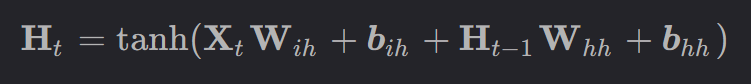

In [7]:
print(rnn.weight_hh_l0.shape) #[hidden dim, hidden dim]


torch.Size([10, 10])


In [8]:
print(rnn.weight_ih_l0.shape) #[hidden dim, feature dim]


torch.Size([10, 100])


In [9]:
print(rnn.bias_hh_l0.shape) #eq[hidden dim]


torch.Size([10])


In [10]:
print(rnn.bias_hh_l0.shape) #eq[hidden dim]


torch.Size([10])


In [11]:
# multi-layer RNN (2 layer )
rnn=nn.RNN(100,10,num_layers=2)  #[input dim(feature dim/word vector),hidden dim]
print(rnn._parameters.keys())


odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])


In [12]:
#[hidden dim, hidden dim],[hidden dim, feature dim]
print(rnn.weight_hh_l0.shape,rnn.weight_ih_l0.shape)   #第0层


torch.Size([10, 10]) torch.Size([10, 100])


In [14]:
print(rnn.weight_hh_l1.shape,rnn.weight_ih_l1.shape)  #第1层


# hidden dim相当于全连接中的一个隐藏层，可以负责升维或者是降维的操作
# 当有单层的rnn变成多层的rnn时，也就意味着此时对于下一层RNN的输入不是原来的特征，而是经过第一层rnn处理后的特征
# 0 layer :word vector:100
# 1 layer :word vector:10

torch.Size([10, 10]) torch.Size([10, 10])


In [2]:
############## nn.RNN ##############

In [15]:
# [input dim(feature dim/word vector),hidden dim,num layers(default Settings is 1)]
rnn = nn.RNN(input_size=100, hidden_size=20, num_layers=1)
print(rnn)
#RNN(100, 20)

RNN(100, 20)


In [16]:
# x：[seq len, batch, word vector]
x = torch.randn(10, 3, 100)
# out:[seq len,batch,hidden dim] [10,3,20]
# h0/ht:[num layers,batch,hidden dim] [1,3,20]
out, h = rnn(x, torch.zeros(1, 3, 20))
print(out.shape, h.shape)
#torch.Size([10, 3, 20]) torch.Size([1, 3, 20])

torch.Size([10, 3, 20]) torch.Size([1, 3, 20])


In [8]:
rnn = nn.RNN(input_size=100, hidden_size=20, num_layers=4)
print(rnn)
#RNN(100, 20, num_layers=4)

RNN(100, 20, num_layers=4)


In [9]:
x = torch.randn(10, 3, 100)
# out:[seq len,batch,hidden dim] [10,3,20]
# h0/ht:[num layers,batch,hidden dim] [4,3,20]
out, h = rnn(x, torch.zeros(4, 3, 20))
#out, h = rnn(x)  #与上一行等价，这里没有传h0进来
print(out.shape, h.shape)
# torch.Size([10, 3, 20]) torch.Size([4, 3, 20])
# print(vars(rnn))

torch.Size([10, 3, 20]) torch.Size([4, 3, 20])


In [10]:
# 多层RNN与单层RNN对比，out.shape不变，但h.shape改变
# out同样是最后输出的集合，表示为[h0,h1,…,hi]的组合叠加
# h则是每一层最后隐藏单元的集合

In [17]:
################ nn.RNNcell ################
print('rnn by cell')

# 与nn.RNN相比，nn.RNNcell没有循环
# RNNcell的forward参数，ht=rnncell[xt,ht_1]
# xt:[b,word vec]
# ht_1/ht:[num_layer,b,h_dim]
# out=torch.stack[h1,h2,...,ht]

rnn by cell


In [14]:
# 1-layer
cell1 = nn.RNNCell(100, 20)  #[word vec,h_dim]
h1 = torch.zeros(3, 20)  #[b,h_dim]
for xt in x:
    h1 = cell1(xt, h1)
#    print(h1.shape)
print(h1.shape)
    # torch.Size([3, 20])

torch.Size([3, 20])


In [15]:
# multi-layer
cell1 = nn.RNNCell(100, 30)   #[word vec,h_dim],100 dim reduce to 30
cell2 = nn.RNNCell(30, 20)    #[word vec,h_dim],30 dim reduce to 20
h1 = torch.zeros(3, 30)
h2 = torch.zeros(3, 20)
for xt in x:
    h1 = cell1(xt, h1)
    h2 = cell2(h1, h2)
print(h2.shape)
    #torch.Size([3, 20])

torch.Size([3, 20])


In [16]:
################ nn.LSTM ################

In [17]:
 print('Lstm')

# LSTM.forward()
# out,(ht,ct)=lstm(x,[(ht_1,ct_1)])  ht_1=ct_1
# x : [seq , b, word vec]
# h/c :[num_layer ,b, h]
# out :[seq , b, h]

Lstm


In [18]:
lstm = nn.LSTM(input_size=100, hidden_size=20, num_layers=4)
print(lstm)
#LSTM(100, 20, num_layers=4)
x = torch.randn(10, 3, 100)
out, (h, c) = lstm(x)
print(out.shape, h.shape, c.shape)
# torch.Size([10, 3, 20]) torch.Size([4, 3, 20]) torch.Size([4, 3, 20])

LSTM(100, 20, num_layers=4)
torch.Size([10, 3, 20]) torch.Size([4, 3, 20]) torch.Size([4, 3, 20])


In [19]:
############# nn.LSTMCell ###########

# LSTMCell.forward()
# ht,ct = lstmcell(xt,[ht_1,ct_1])
# xt:[b,word vec]
# ht/ct:[b,h]


In [20]:
# one layer
print('one layer lstm')
cell = nn.LSTMCell(input_size=100, hidden_size=20)
h = torch.zeros(3, 20)
c = torch.zeros(3, 20)
for xt in x:
    h, c = cell(xt, [h, c])
print(h.shape, c.shape)
    #torch.Size([3, 20]) torch.Size([3, 20])

one layer lstm
torch.Size([3, 20]) torch.Size([3, 20])


In [21]:
#two layer
print('two layer lstm')
cell1 = nn.LSTMCell(input_size=100, hidden_size=30)
cell2 = nn.LSTMCell(input_size=30, hidden_size=20)
h1 = torch.zeros(3, 30)
c1 = torch.zeros(3, 30)
h2 = torch.zeros(3, 20)
c2 = torch.zeros(3, 20)
for xt in x:
    h1, c1 = cell1(xt, [h1, c1])
    h2, c2 = cell2(h1, [h2, c2])
print(h2.shape, c2.shape)
    #torch.Size([3, 20]) torch.Size([3, 20])

two layer lstm
torch.Size([3, 20]) torch.Size([3, 20])
